# Multiple MLP Architectures using Keras on MNIST

## Purpose
The purpose of the study is to try out **3 different MLP architectures on MNIST dataset to compare the performance.** The implementation is done in Keras. 

## Steps at a Glance:

1. Take the famous MNIST dataset as input. http://yann.lecun.com/exdb/mnist/
2. Feed it into **2-layered MLP Architecture: Input(784)-ReLu(512)-ReLu(128)-Sigmoid(output)**
3. Find the accuracy and draw the **Loss vs Epoch Plot**
4. Introduce **Batch Normalization and Dropouts.**
5. Evaluate the model again by estimating accuracy and drawing loss diagram.
6. Feed same input to **3 layered MLP Architecture: Input(784)-ReLu(512)-ReLu(256)-ReLu(64)-Sigmoid(output)**
7. Introduce Batch Normalization and Dropouts & evaluate the model again.
8. Feed same input to **5 layered MLP Architecture: Input(784)-ReLu(512)-ReLu(256)-ReLu(144)-ReLu(96)-ReLu(36)-Sigmoid(output)**
9. Introduce Batch Normalization and Dropouts & evaluate the model again.
10. Analyze the output from the above 3 architectures and draw conclusions .

In [53]:
# if you keras is not using tensorflow as backend 
# set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

## Loading and Pre-processing Data

In [54]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [55]:
print("Number of training examples :", X_train.shape[0], 
      "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of testing examples :", X_test.shape[0], 
      "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


In [56]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [57]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], 
          "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of testing examples :", X_test.shape[0], 
          "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of testing examples : 10000 and each image is of shape (784)


In [58]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [59]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [60]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [61]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [62]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing 
# a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, 
# kernel_initializer='glorot_uniform', bias_initializer='zeros', 
# kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) 
# where activation is the element-wise activation function passed as the activation 
# argument, kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through 
# the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions  available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


# Initializations

In [63]:
# initialization of some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# Custom-Defined Functions

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(fig, x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [65]:
# To train the model using Adam
# This function is common to all models.
def trainModel(model):
    model.compile(optimizer='adam', 
                      loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, Y_train, batch_size=batch_size, 
                epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
    
    return history

In [66]:
# To plot the Train & Test loss graph. 
# This function is common to all models.
def plotGraph(model, history):
    score = model.evaluate(X_test, Y_test, verbose=0) 
    print('Test score:', score[0]) 
    print('Test accuracy:', score[1])

    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

    # list of epoch numbers
    x = list(range(1,nb_epoch+1))

    # print(history.history.keys())
    # dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
    # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, 
            #epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

    # we will get val_loss and val_acc only 
    # when you pass the paramter validation_data
    # val_loss : validation loss
    # val_acc : validation accuracy

    # loss : training loss
    # acc : train accuracy
    # for each key in histrory.histrory we will have 
    # a list of length equal to number of epochs

    vy = history.history['val_loss']
    ty = history.history['loss']
    plt_dynamic(fig, x, vy, ty, ax)

## Model 1: (2-layered MLP Architecture)

In [67]:
def plotWeightM1(model):
    w_after = model.get_weights()

    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    out_w = w_after[4].flatten().reshape(-1,1)


    fig = plt.figure()
    plt.title("Weight matrices after model trained")
    plt.subplot(1, 3, 1)
    plt.title("Trained Weights")
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden Layer 1')

    plt.subplot(1, 3, 2)
    plt.title("Trained Weights")
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')

    plt.subplot(1, 3, 3)
    plt.title("Trained Weights")
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Output Layer ')
    plt.show()


### Input(784)-ReLu(512)-ReLu(128)-Softmax(output)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_80 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_81 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 268us/step - loss: 0.2330 - acc: 0.9315 - val_loss: 0.1082 - val_acc: 0.9673
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0859 - acc: 0.9741 - val_loss: 0.0875 - val_acc: 0.9736
Epoch 3/20
60000/60000 [==============================] - 3s 57us/ste

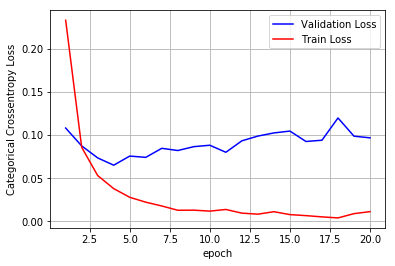

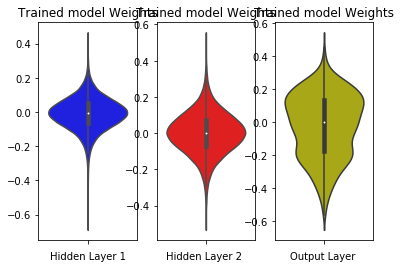

In [68]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', 
                    input_shape=(input_dim,), kernel_initializer='he_normal'))
model_relu.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

history = trainModel(model=model_relu)
plotGraph(model=model_relu, history=history)
plotWeightM1(model=model_relu)

### Model 1: M1 + Batch-Normalization on hidden Layers 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_41 (Batc (None, 512)               2048      
_________________________________________________________________
dense_83 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_42 (Batc (None, 128)               512       
_________________________________________________________________
dense_84 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 276us/step - loss: 0

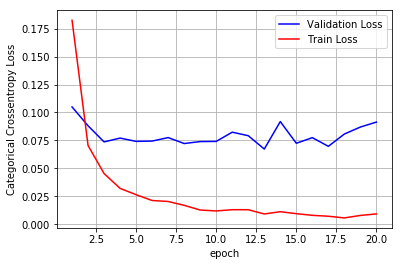

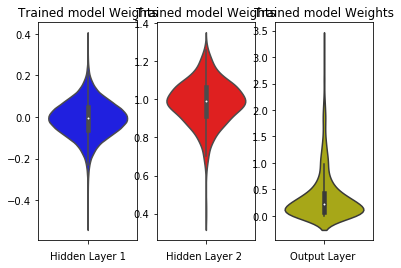

In [69]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) 
# we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', 
                    input_shape=(input_dim,), kernel_initializer='he_normal'))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

model_batch.summary()


history = trainModel(model=model_batch)
plotGraph(model=model_batch, history=history)
plotWeightM1(model=model_batch)

### Model 1: M1 + Batch-Normalization + Dropout

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_43 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_44 (Batc (None, 128)               512       
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 10)                1290      
Total para

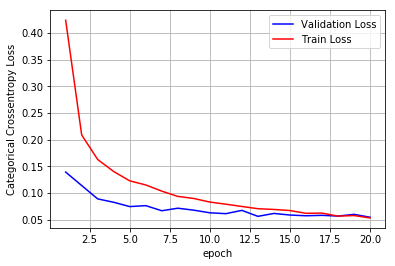

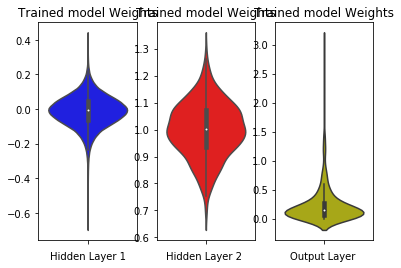

In [70]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', 
                    input_shape=(input_dim,), kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

history = trainModel(model=model_drop)
plotGraph(model=model_drop, history=history)
plotWeightM1(model=model_drop)

## Model 2 (3-layered MLP Architecture):

### Plot Weights: Common Function

In [71]:
def plotWeightM2(model):
    w_after = model.get_weights()

    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    h3_w = w_after[4].flatten().reshape(-1,1)
    out_w = w_after[6].flatten().reshape(-1,1)


    fig = plt.figure()
    plt.title("Weight matrices after model trained")
    plt.subplot(1, 4, 1)
    plt.title("Trained Wt")
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden Layer 1')

    plt.subplot(1, 4, 2)
    plt.title("Trained Wt")
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')

    plt.subplot(1, 4, 3)
    plt.title("Trained Wt")
    ax = sns.violinplot(y=h3_w, color='g')
    plt.xlabel('Hidden Layer 3 ')

    plt.subplot(1, 4, 4)
    plt.title("Trained Wt")
    ax = sns.violinplot(y=out_w,color='m')
    plt.xlabel('Output Layer ')
    plt.show()

### Input(784)-ReLu(512)-ReLu(256)-ReLu(64)-Softmax(output)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_89 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_90 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_91 (Dense)             (None, 10)                650       
Total params: 550,346
Trainable params: 550,346
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 269us/step - loss: 0.2229 - acc: 0.9336 - val_loss: 0.1109 - val_acc: 0.9647
Epoch 2/20
60000/60000 [==============================] - 4s 66us/step - l

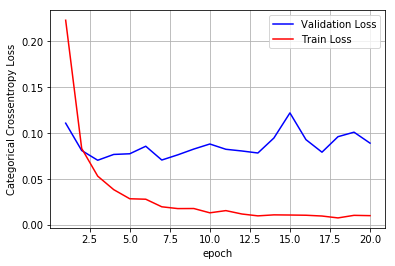

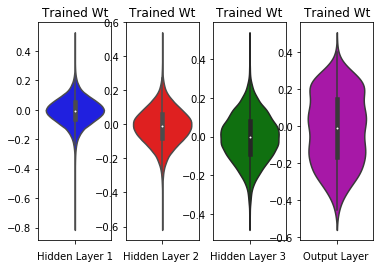

In [72]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', 
                    input_shape=(input_dim,), kernel_initializer='he_normal'))
model_relu.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

history = trainModel(model=model_relu)
plotGraph(model=model_relu, history=history)
plotWeightM2(model=model_relu)

### Model 2: M2 + Batch-Normalization on 3 hidden Layers 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_45 (Batc (None, 512)               2048      
_________________________________________________________________
dense_93 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_46 (Batc (None, 256)               1024      
_________________________________________________________________
dense_94 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_47 (Batc (None, 64)                256       
_________________________________________________________________
dense_95 (Dense)             (None, 10)                650       
Total para

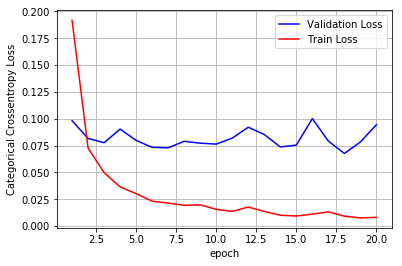

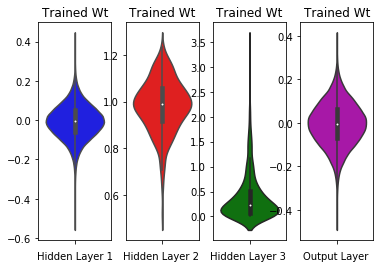

In [73]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', 
                    input_shape=(input_dim,), kernel_initializer='he_normal'))
model_batch.add(BatchNormalization())

model_batch.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_batch.add(BatchNormalization())

model_batch.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

model_batch.summary()

history = trainModel(model=model_batch)
plotGraph(model=model_batch, history=history)
plotWeightM2(model=model_batch)

### Model 2: M2 + Batch-Normalization + Dropout

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_48 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_49 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 64)                16448     
__________

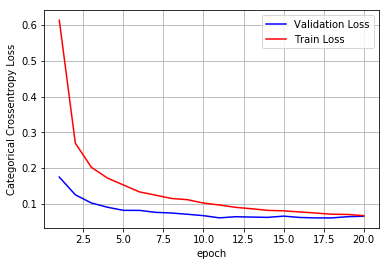

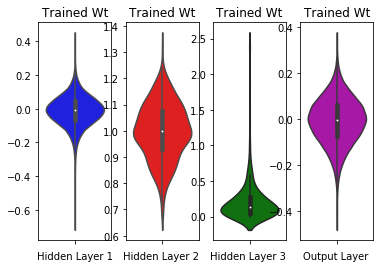

In [74]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', 
                input_shape=(input_dim,), kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

history = trainModel(model=model_drop)
plotGraph(model=model_drop, history=history)
plotWeightM2(model=model_drop)

## Model 3 (5-layered MLP Architecture):

### Plot Weights: Common Function

In [75]:
def plotWeightM3(model):
    w_after = model.get_weights()

    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    h3_w = w_after[4].flatten().reshape(-1,1)
    h4_w = w_after[6].flatten().reshape(-1,1)
    h5_w = w_after[8].flatten().reshape(-1,1)
    out_w = w_after[10].flatten().reshape(-1,1)


    fig = plt.figure()
    plt.title("Weight matrices after model trained")
    plt.subplot(1, 6, 1)
    plt.title("Weights")
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden 1')

    plt.subplot(1, 6, 2)
    plt.title("Weights")
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden 2 ')

    plt.subplot(1, 6, 3)
    plt.title("Weights")
    ax = sns.violinplot(y=h3_w, color='g')
    plt.xlabel('Hidden 3 ')

    plt.subplot(1, 6, 4)
    plt.title("Weights")
    ax = sns.violinplot(y=h4_w, color='c')
    plt.xlabel('Hidden 4 ')
    
    plt.subplot(1, 6, 5)
    plt.title("Weights")
    ax = sns.violinplot(y=h5_w, color='m')
    plt.xlabel('Hidden 5 ')
    
    plt.subplot(1, 6, 6)
    plt.title("Weights")
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Out Layer')
    plt.show()

### Input(784)-ReLu(512)-ReLu(256)-ReLu(144)-ReLu(96)-ReLu(36)-Softmax(output)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_101 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_102 (Dense)            (None, 144)               37008     
_________________________________________________________________
dense_103 (Dense)            (None, 96)                13920     
_________________________________________________________________
dense_104 (Dense)            (None, 36)                3492      
_________________________________________________________________
dense_105 (Dense)            (None, 10)                370       
Total params: 588,038
Trainable params: 588,038
Non-trainable params: 0
_________________________________________________________________
None

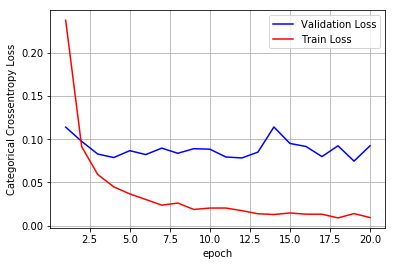

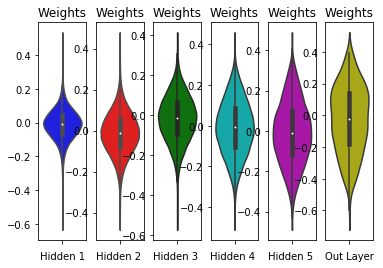

In [76]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', 
                input_shape=(input_dim,), kernel_initializer='he_normal'))
model_relu.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dense(144, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dense(96, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dense(36, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

history = trainModel(model=model_relu)
plotGraph(model=model_relu, history=history)
plotWeightM3(model=model_relu)

### Model 3: M3 + Batch-Normalization on 5 hidden Layers 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_51 (Batc (None, 512)               2048      
_________________________________________________________________
dense_107 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_52 (Batc (None, 256)               1024      
_________________________________________________________________
dense_108 (Dense)            (None, 144)               37008     
_________________________________________________________________
batch_normalization_53 (Batc (None, 144)               576       
_________________________________________________________________
dense_109 (Dense)            (None, 96)                13920     
__________

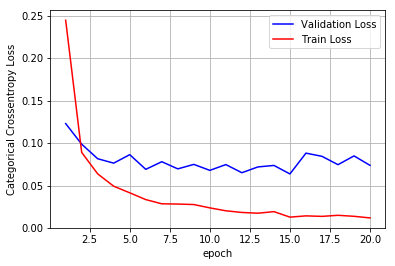

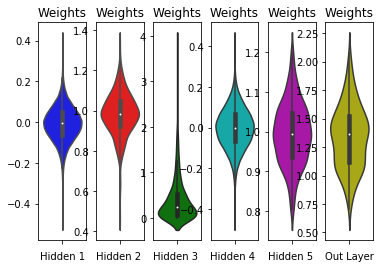

In [77]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', 
                    input_shape=(input_dim,), kernel_initializer='he_normal'))
model_batch.add(BatchNormalization())

model_batch.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_batch.add(BatchNormalization())

model_batch.add(Dense(144, activation='relu', kernel_initializer='he_normal'))
model_batch.add(BatchNormalization())

model_batch.add(Dense(96, activation='relu', kernel_initializer='he_normal'))
model_batch.add(BatchNormalization())

model_batch.add(Dense(36, activation='relu', kernel_initializer='he_normal'))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

model_batch.summary()


history = trainModel(model=model_batch)
plotGraph(model=model_batch, history=history)
plotWeightM3(model=model_batch)

### Model 3: M3 + Batch-Normalization + Dropout

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_56 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_113 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_57 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_114 (Dense)            (None, 144)               37008     
__________

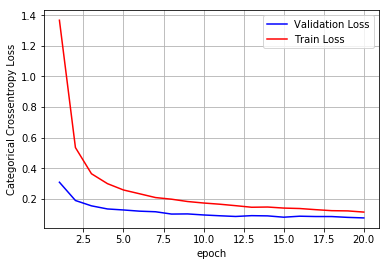

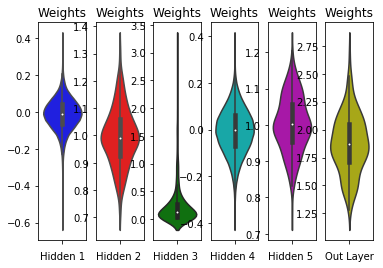

In [78]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', 
                input_shape=(input_dim,), kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(144, activation='relu', kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(96, activation='relu', kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(36, activation='relu', kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

history = trainModel(model=model_drop)
plotGraph(model=model_drop, history=history)
plotWeightM3(model=model_drop)

# Summary Statistics

| Model | Total Parameters | Accuracy | Loss vs Epoch Plot |
------------- |:----------:|:----------:|:-------------:|
**Model 1 (784x512x128x10)** | 468,874 | **98.18** | Diverging |
**M1 + Batch-Normalization** | 471,434 | **98.06** | Diverging |
**M1 + Batch-Normalization+Dropout** | 471,434 | **98.32** | **Converging** |
 | |
**Model 2 (784x512x256x64x10)** | 550,346 | **97.85** | Diverging |
**M2 + Batch-Normalization** | 553,674 | **98.06** | Diverging |
**M2 + Batch-Normalization+Dropout** | 553,674 | **98.24** | **Converging** |
 | |
**Model 3 (784x512x256x144x96x10)** | 588,038 | **97.96** | Diverging |
**M3 + Batch-Normalization** | 592,214 | **97.88** | Diverging |
**M3 + Batch-Normalization+Dropout** | 592,214 | **98.26** | **Converging** |



# Conclusions

1. The **difference in accuracy between 2, 3 & 5 layered networks is very small**. This could be due to the simplicity and small size of input data. 
2. The **'cross entropy loss vs epoch' plot** for train and test data is found **diverging, when the dropout layer is not added**. This means reduction in training loss but increase in test loss at the same time, **indicative of overfitting.**
3. Thus, **addition of dropout layer is found as a good regularization** in practice.
4. The accuracy is also more when Batch Normalization and dropout layers are added.
5. All distributions of trained weights along all the layers are expectedly found as Gaussian curves.
6. For MNIST problem, **model M1 coupled with Batch Normalizaton and Dropout seems to be the best bet.**